In [1]:
%load_ext autoreload
%autoreload 2

import sys
import pandas as pd
#ADD YOUR DIRECTORY HERE
sys.path.append('/Users/lorenzostigliano/Documents/University/Imperial/Summer Term/thesis-imperial/src/')
sys.path.append('/Users/lorenzostigliano/Documents/University/Imperial/Summer Term/thesis-imperial/src/utils')
sys.path.append('/Users/lorenzostigliano/Documents/University/Imperial/Summer Term/thesis-imperial/src/models')

from utils.analysis import *
from utils.getters import * 
from utils.plotters import * 
from models_config.model_config_GSP import *


In [131]:
analysis_type="model_assessment"
dataset_split="val"
dataset = "gender_data"
CV=["3Fold", "5Fold", "10Fold"]

models_args=[
    gcn_student_lsp_ensamble_4_args
]

all_model_metrics_mean = []
all_model_metrics_var = []
all_model_best_student = []

for model_arg in models_args:
    
    print(model_arg["model_name"])

    model_metrics_mean = []
    model_metrics_var = []
    model_best_student = []

    for view in [0,2,4,5]:
        mean, var, best_students = get_best_student_ensamble_detailed(
            model=model_arg["model_name"], 
            view=view, 
            CV=CV,
            dataset=dataset,
            runs=[i for i in range(10)], 
            analysis_type=analysis_type,
            dataset_split=dataset_split,
            model_args=model_arg
        )
        print(best_students)
        model_metrics_mean.append(mean)
        model_metrics_var.append(var)
        model_best_student.append(best_students)

    all_model_metrics_mean.append(model_metrics_mean)
    all_model_metrics_var.append(model_metrics_var)
    all_model_best_student.append(model_best_student)

gcn_student_lsp_ensamble_4
[[0.96, 0.0003675925925925923, 2], [0.96, 0.0003675925925925923, 2], [0.96, 0.0003675925925925923, 2], [0.96, 0.0003675925925925923, 2], [0.96, 0.0003675925925925923, 2]]
[[0.968888888888889, 5.949074074074056e-05, 1], [0.9306944444444444, 0.0004889853395061724, 3], [0.968888888888889, 5.949074074074056e-05, 1], [0.968888888888889, 5.949074074074056e-05, 1], [0.968888888888889, 5.949074074074056e-05, 1]]
[[0.9649999999999999, 0.00012222222222222262, 2], [0.9143055555555557, 0.00022918595679012328, 1], [0.9649999999999999, 0.00012222222222222262, 2], [0.9649999999999999, 0.00012222222222222262, 2], [0.9649999999999999, 0.00012222222222222262, 2]]
[[0.9690277777777778, 0.00019446373456790262, 1], [0.9690277777777778, 0.00019446373456790262, 1], [0.9690277777777778, 0.00019446373456790262, 1], [0.9690277777777778, 0.00019446373456790262, 1], [0.9690277777777778, 0.00019446373456790262, 1]]


In [132]:
analysis_type="model_assessment"
dataset_split="val"
dataset = "gender_data"
CV=["3Fold", "5Fold", "10Fold"]

models_args=[
    gcn_student_lsp_ensamble_4_args_1,
    gcn_student_lsp_ensamble_4_args_2,
    gcn_student_lsp_ensamble_4_args_3,
    gcn_student_lsp_ensamble_4_args_4
]

for model_arg in models_args:
    
    print(model_arg["model_name"])

    model_metrics_mean = []
    model_metrics_var = []
    model_best_student = []

    for view in [0,2,4,5]:
        mean, var, best_students = get_best_student_ensamble_detailed(
            model="gcn_student_lsp_ensamble_4_ablation", 
            view=view, 
            CV=CV,
            dataset=dataset,
            runs=[i for i in range(10)], 
            analysis_type=analysis_type,
            dataset_split=dataset_split,
            model_args=model_arg
        )
        print(best_students)
        model_metrics_mean.append(mean)
        model_metrics_var.append(var)
        model_best_student.append(best_students)

    all_model_metrics_mean.append(model_metrics_mean)
    all_model_metrics_var.append(model_metrics_var)
    all_model_best_student.append(model_best_student)

gcn_student_lsp_ensamble_4
[[0.9590277777777777, 0.0008345871913580261, 1], [0.9388888888888889, 0.0004918981481481483, 2], [0.9388888888888889, 0.0004918981481481483, 2], [0.9590277777777777, 0.0008345871913580261, 1], [0.9388888888888889, 0.0004918981481481483, 2]]
[[0.974027777777778, 0.0005069637345678996, 3], [0.974027777777778, 0.0005069637345678996, 3], [0.974027777777778, 0.0005069637345678996, 3], [0.974027777777778, 0.0005069637345678996, 3], [0.974027777777778, 0.0005069637345678996, 3]]
[[0.9561111111111111, 0.00022037037037037085, 2], [0.9561111111111111, 0.00022037037037037085, 2], [0.9561111111111111, 0.00022037037037037085, 2], [0.9561111111111111, 0.00022037037037037085, 2], [0.9561111111111111, 0.00022037037037037085, 2]]
[[0.9552777777777777, 0.00038958333333333336, 3], [0.9083333333333334, 0.0009459876543209866, 1], [0.9083333333333334, 0.0009459876543209866, 1], [0.9552777777777777, 0.00038958333333333336, 3], [0.9083333333333334, 0.0009459876543209866, 1]]
gcn_stu

In [133]:
df_best_student = np.array(all_model_best_student)
df = []
for i in range(4):
    df.append(df_best_student[:, i, :, 0].flatten())
df = pd.DataFrame(np.array(df))
# Calculate the mean of columns
mean_row = df.mean(axis=0)

# Append the mean row to the DataFrame
df = df.append(mean_row, ignore_index=True).T
index_values = ['max rep', 'max acc', 'max f1', 'weighted acc', 'weighted f1'] * (len(df) // 5) + ['max rep', 'max acc', 'max f1', 'weighted acc', 'weighted f1'][:len(df) % 5]

# Assign the new index to the DataFrame
df.index = index_values
df.shape

(25, 5)

In [134]:
df_best_student = np.array(all_model_best_student)
df_std = []
for i in range(4):
    df_std.append(df_best_student[:, i, :, 1].flatten())
df_std = pd.DataFrame(np.array(df_std))
# Calculate the mean of columns
mean_row = df_std.mean(axis=0)

# Append the mean row to the DataFrame
df_std_rep = df_std.append(mean_row, ignore_index=True).T
index_values = ['max rep', 'max acc', 'max f1', 'weighted acc', 'weighted f1'] * (len(df) // 5) + ['max rep', 'max acc', 'max f1', 'weighted acc', 'weighted f1'][:len(df) % 5]

# Assign the new index to the DataFrame
df_std_rep.index = index_values
df_std_rep.shape

(25, 5)

In [135]:
index = df_best_student[:,:,:,2]
all_data_accuracy = []
for view_index in range(4):
    view_data = []
    ensamble_indexes = index[:,view_index,:]
    ensamble_data = np.array(all_model_metrics_mean)[:,view_index]
    #number of ensembles 
    for i in range(5):
        view_data.append([ensamble_data[i][int(best_student_index)][0] for best_student_index in ensamble_indexes[i]])
    all_data_accuracy.append(np.array(view_data).flatten())

In [136]:
all_data_var = []
for view_index in range(4):
    view_data = []
    ensamble_indexes = index[:,view_index,:]
    ensamble_data = np.array(all_model_metrics_var)[:,view_index]
    #number of ensembles 
    for i in range(5):
        view_data.append([ensamble_data[i][int(best_student_index)][0] for best_student_index in ensamble_indexes[i]])
    all_data_var.append(np.array(view_data).flatten())

In [137]:
df_acuracy = pd.DataFrame(np.array(all_data_accuracy))
# Calculate the mean of columns
mean_row = df_acuracy.mean(axis=0)

# Append the mean row to the DataFrame
df_acuracy = df_acuracy.append(mean_row, ignore_index=True).T
# Create the list of repeating index values
index_values = ['max rep', 'max acc', 'max f1', 'weighted acc', 'weighted f1'] * (len(df_acuracy) // 5) + ['max rep', 'max acc', 'max f1', 'weighted acc', 'weighted f1'][:len(df_acuracy) % 5]

# Assign the new index to the DataFrame
df_acuracy.index = index_values
df_acuracy.shape

(25, 5)

In [138]:
df_std = pd.DataFrame(np.array(all_data_var))
# Calculate the mean of columns
mean_row = df_std.mean(axis=0)

# Append the mean row to the DataFrame
df_std = df_std.append(mean_row, ignore_index=True).T
# Create the list of repeating index values
index_values = ['max rep', 'max acc', 'max f1', 'weighted acc', 'weighted f1'] * (len(df_std) // 5) + ['max rep', 'max acc', 'max f1', 'weighted acc', 'weighted f1'][:len(df_std) % 5]

# Assign the new index to the DataFrame
df_std.index = index_values
df_std.shape

(25, 5)

In [139]:
df_acuracy = df_acuracy.loc['weighted acc'].T
df_std = df_std.loc['weighted acc'].T
df_std = np.sqrt(df_std)

df_rep = df.loc['weighted acc'].T
df_std_rep = df_std_rep.loc['weighted acc'].T
df_std_rep = np.sqrt(df_std_rep)

In [140]:
import pandas as pd

# Assuming you have a DataFrame called 'df' with the given data

# Define the new column labels
x_ticks = ['Original', 'No alpha', 'No beta', 'No gamma', 'No lambda']
# Rename the columns using the new labels
df_acuracy.columns = x_ticks
df_rep.columns = x_ticks
df_std.columns = x_ticks
df_std_rep.columns = x_ticks
# Display the modified DataFrame
df_std

,Original,No alpha,No beta,No gamma,No lambda
0,0.009602,0.018193,0.009789,0.001086,0.005550
1,0.004146,0.007972,0.004039,0.001177,0.003695
2,0.002405,0.010521,0.002384,0.002686,0.005132
3,0.003948,0.009723,0.004060,0.001354,0.001646
4,0.005718,0.012245,0.005794,0.001704,0.004287


In [146]:
df_acuracy.T*100

,0,1,2,3,4
Original,60.130316,61.953215,64.023050,63.190064,62.324161
No alpha,55.196274,65.093676,62.477232,56.700841,59.867006
No beta,60.134500,61.958343,64.046497,63.175765,62.328776
No gamma,55.248243,59.948777,60.826810,55.461344,57.871293
No lambda,62.021271,62.778330,66.334831,64.913534,64.011992


In [147]:
df_std.T*100

,0,1,2,3,4
Original,0.960210,0.414608,0.240506,0.394778,0.571751
No alpha,1.819282,0.797159,1.052145,0.972325,1.224508
No beta,0.978877,0.403866,0.238414,0.406000,0.579436
No gamma,0.108583,0.117739,0.268551,0.135410,0.170373
No lambda,0.555017,0.369474,0.513204,0.164600,0.428668


In [145]:
df_rep.T*100

,0,1,2,3,4
Original,96.000000,96.888889,96.500000,96.902778,96.572917
No alpha,95.902778,97.402778,95.611111,95.527778,96.111111
No beta,95.972222,96.805556,96.500000,96.902778,96.545139
No gamma,97.888889,97.722222,92.972222,97.138889,96.430556
No lambda,95.486111,95.291667,95.041667,92.027778,94.461806


In [148]:
df_std_rep.T*100

,0,1,2,3,4
Original,1.917270,0.771302,1.105542,1.394503,1.363607
No alpha,2.888922,2.251586,1.484488,1.973787,2.208792
No beta,1.945436,0.645497,1.105542,1.394503,1.357226
No gamma,1.527525,0.166667,0.583333,0.250000,0.831247
No lambda,1.310643,1.340044,2.963936,1.899480,1.994144


In [203]:
def ablation_study_model_f1(dataset, final_model_args, final_model, views, all_student_index, runs):
    view_mean = []
    view_std = []

    for best_student_i, view in enumerate(views):

        model_mean = []
        model_std = []

        index_student = all_student_index[best_student_i]
        for i, model_arg in enumerate(final_model_args):
            mean, std = get_student_model_metric(dataset, final_model[i], CV, runs, analysis_type, dataset_split, view, model_arg)
            model_mean.append(mean[index_student])
            model_std.append(std[index_student])
                            
        mean_df = np.array(model_mean[0])[:,3]
        mean_df = mean_df[np.newaxis, :]
        
        std_df = np.array(model_std[0])[:,3]
        std_df = std_df[np.newaxis, :]

        view_mean.append(mean_df)
        view_std.append(std_df)

    average_across_views_metric = []
    for i in range(len(views)):
        average_across_views_metric.append(view_mean[i][:,-1])

    average_across_views_std = []
    for i in range(len(views)):
        average_across_views_std.append(view_std[i][:,-1])

    average_across_views_df = pd.DataFrame(average_across_views_metric)
    # Calculate the mean of each row
    average_across_views_df_mean = average_across_views_df.mean(axis=0)  
    # Create a DataFrame from the row means
    average_across_views_df_mean = pd.DataFrame(average_across_views_df_mean).T  
    # Append the row mean DataFrame to the original DataFrame
    average_across_views_df = average_across_views_df.append(average_across_views_df_mean, ignore_index=True)

    average_across_views_df_std_mean = pd.DataFrame(average_across_views_std)

    return average_across_views_df, average_across_views_df_std_mean

In [215]:
dataset = "gender_data"
final_model_args = [gcn_student_lsp_ensamble_4_args]
final_model = ['gcn_student_lsp_ensamble_4']
views = [0,2,4,5]
all_student_index = [2,1,2,1]
runs = [i for i in range(10)]
f1_args, f1_std_arg  = ablation_study_model_f1(dataset, final_model_args, final_model, views, all_student_index, runs)

In [217]:
f1_args*100, f1_std_arg*100

(           0
 0  61.586573
 1  58.499451
 2  60.390094
 3  59.416408
 4  59.973131,
           0
 0  2.590668
 1  1.282769
 2  1.009295
 3  0.452370)

In [219]:
dataset = "gender_data"
final_model_args = [gcn_student_lsp_ensamble_4_args_1]
final_model = ['gcn_student_lsp_ensamble_4_ablation']
views = [0,2,4,5]
all_student_index = [1,3,2,3]
runs = [i for i in range(10)]
f1_args_1, f1_std_args_1  = ablation_study_model_f1(dataset, final_model_args, final_model, views, all_student_index, runs)

KeyboardInterrupt: 

In [218]:
f1_args_1*100, f1_std_args_1*100

(           0
 0  35.404557
 1  68.259298
 2  65.566888
 3  51.144052
 4  55.093699,
            0
 0  10.984270
 1   3.804097
 2   5.063562
 3  10.331039)

In [208]:
dataset = "gender_data"
final_model_args = [gcn_student_lsp_ensamble_4_args_2]
final_model = ['gcn_student_lsp_ensamble_4_ablation']
views = [0,2,4,5]
all_student_index = [2,1,2,1]
runs = [i for i in range(10)]
f1_args_2, f1_std_args_2  = ablation_study_model_f1(dataset, final_model_args, final_model, views, all_student_index, runs)

In [220]:
f1_args_2*100, f1_std_args_2*100

(           0
 0  61.555729
 1  58.463052
 2  60.427318
 3  59.432500
 4  59.969650,
           0
 0  2.589357
 1  1.278207
 2  1.156327
 3  0.466368)

In [211]:
dataset = "gender_data"
final_model_args = [gcn_student_lsp_ensamble_4_args_3]
final_model = ['gcn_student_lsp_ensamble_4_ablation']
views = [0,2,4,5]
all_student_index = [3,1,0,2]
runs = [i for i in range(10)]
f1_args_3, f1_std_args_3  = ablation_study_model_f1(dataset, final_model_args, final_model, views, all_student_index, runs)

In [221]:
f1_args_3*100, f1_std_args_3*100

(           0
 0  44.312494
 1  54.798166
 2  59.383920
 3  55.036998
 4  53.382895,
           0
 0  1.246353
 1  0.264189
 2  1.068835
 3  0.557174)

In [213]:
dataset = "gender_data"
final_model_args = [gcn_student_lsp_ensamble_4_args_4]
final_model = ['gcn_student_lsp_ensamble_4_ablation']
views = [0,2,4,5]
all_student_index = [2,3,1,3]
runs = [i for i in range(10)]
f1_args_4, f1_std_args_4  = ablation_study_model_f1(dataset, final_model_args, final_model, views, all_student_index, runs)

In [222]:
f1_args_4*100, f1_std_args_4*100

(           0
 0  61.467110
 1  60.557138
 2  66.614714
 3  60.524413
 4  62.290844,
           0
 0  1.087701
 1  0.899530
 2  2.046115
 3  0.629909)

# Ablation study - BreastMNIST

In [108]:
from models_config.model_config_BreastMNIST import *

In [109]:
analysis_type="model_assessment"
dataset_split="val"
dataset = "BreastMNIST"
CV=["3Fold", "5Fold", "10Fold"]

models_args=[
    gcn_student_lsp_ensamble_3_BreastMNIST_args
]

all_model_metrics_mean = []
all_model_metrics_var = []
all_model_best_student = []

for model_arg in models_args:
    
    print(model_arg["model_name"])

    model_metrics_mean = []
    model_metrics_var = []
    model_best_student = []

    for view in [-1]:
        mean, var, best_students = get_best_student_ensamble_detailed(
            model=model_arg["model_name"], 
            view=view, 
            CV=CV,
            dataset=dataset,
            runs=[i for i in range(10)], 
            analysis_type=analysis_type,
            dataset_split=dataset_split,
            model_args=model_arg
        )
        print(best_students)
        model_metrics_mean.append(mean)
        model_metrics_var.append(var)
        model_best_student.append(best_students)

    all_model_metrics_mean.append(model_metrics_mean)
    all_model_metrics_var.append(model_metrics_var)
    all_model_best_student.append(model_best_student)

gcn_student_lsp_ensamble_3
[[0.9675, 0.00020995370370370498, 1], [0.9675, 0.00020995370370370498, 1], [0.9675, 0.00020995370370370498, 1], [0.9675, 0.00020995370370370498, 1], [0.9675, 0.00020995370370370498, 1]]


In [110]:
analysis_type="model_assessment"
dataset_split="val"
dataset = "BreastMNIST"
CV=["3Fold", "5Fold", "10Fold"]

models_args=[
    gcn_student_lsp_ensamble_3_BreastMNIST_args_1,
    gcn_student_lsp_ensamble_3_BreastMNIST_args_2,
    gcn_student_lsp_ensamble_3_BreastMNIST_args_3,
    gcn_student_lsp_ensamble_3_BreastMNIST_args_4
]

for model_arg in models_args:
    
    print(model_arg["model_name"])

    model_metrics_mean = []
    model_metrics_var = []
    model_best_student = []

    for view in [-1]:
        mean, var, best_students = get_best_student_ensamble_detailed(
            model="gcn_student_lsp_ensamble_3_ablation", 
            view=view, 
            CV=CV,
            dataset=dataset,
            runs=[i for i in range(10)], 
            analysis_type=analysis_type,
            dataset_split=dataset_split,
            model_args=model_arg
        )
        print(best_students)
        model_metrics_mean.append(mean)
        model_metrics_var.append(var)
        model_best_student.append(best_students)

    all_model_metrics_mean.append(model_metrics_mean)
    all_model_metrics_var.append(model_metrics_var)
    all_model_best_student.append(model_best_student)

gcn_student_lsp_ensamble_3
[[0.9211111111111112, 0.000991049382716051, 0], [0.8416666666666668, 0.007729552469135805, 2], [0.8416666666666668, 0.007729552469135805, 2], [0.9211111111111112, 0.000991049382716051, 0], [0.9211111111111112, 0.000991049382716051, 0]]
gcn_student_lsp_ensamble_3
[[0.9675, 0.00020995370370370498, 1], [0.9675, 0.00020995370370370498, 1], [0.9675, 0.00020995370370370498, 1], [0.9675, 0.00020995370370370498, 1], [0.9675, 0.00020995370370370498, 1]]
gcn_student_lsp_ensamble_3
[[0.9638888888888888, 1.232595164407831e-32, 2], [0.9524999999999999, 2.499999999999983e-05, 1], [0.9524999999999999, 2.499999999999983e-05, 1], [0.9524999999999999, 2.499999999999983e-05, 1], [0.9524999999999999, 2.499999999999983e-05, 1]]
gcn_student_lsp_ensamble_3
[[0.9204166666666665, 0.0011153742283950643, 1], [0.9204166666666665, 0.0011153742283950643, 1], [0.9204166666666665, 0.0011153742283950643, 1], [0.9204166666666665, 0.0011153742283950643, 1], [0.9204166666666665, 0.0011153742283

In [111]:
df_best_student = np.array(all_model_best_student)
df = []
for i in range(1):
    df.append(df_best_student[:, i, :, 0].flatten())
df = pd.DataFrame(np.array(df))
# Calculate the mean of columns
mean_row = df.mean(axis=0)

# Append the mean row to the DataFrame
df = df.append(mean_row, ignore_index=True).T
index_values = ['max rep', 'max acc', 'max f1', 'weighted acc', 'weighted f1'] * (len(df) // 5) + ['max rep', 'max acc', 'max f1', 'weighted acc', 'weighted f1'][:len(df) % 5]

# Assign the new index to the DataFrame
df.index = index_values
df.shape

(25, 2)

In [112]:
df_best_student = np.array(all_model_best_student)
df_var = []
for i in range(1):
    df_var.append(df_best_student[:, i, :, 1].flatten())
df_var = pd.DataFrame(np.array(df_var))
# Calculate the mean of columns
mean_row = df_var.mean(axis=0)

# Append the mean row to the DataFrame
df_var_rep = df_var.append(mean_row, ignore_index=True).T
index_values = ['max rep', 'max acc', 'max f1', 'weighted acc', 'weighted f1'] * (len(df) // 5) + ['max rep', 'max acc', 'max f1', 'weighted acc', 'weighted f1'][:len(df) % 5]

# Assign the new index to the DataFrame
df_var_rep.index = index_values
df_var_rep.shape

(25, 2)

In [113]:
index = df_best_student[:,:,:,2]
all_data_accuracy = []
for view_index in range(1):
    view_data = []
    ensamble_indexes = index[:,view_index,:]
    ensamble_data = np.array(all_model_metrics_mean)[:,view_index]
    #number of ensembles 
    for i in range(5):
        view_data.append([ensamble_data[i][int(best_student_index)][0] for best_student_index in ensamble_indexes[i]])
    all_data_accuracy.append(np.array(view_data).flatten())

In [114]:
all_data_var = []
for view_index in range(1):
    view_data = []
    ensamble_indexes = index[:,view_index,:]
    ensamble_data = np.array(all_model_metrics_var)[:,view_index]
    #number of ensembles 
    for i in range(5):
        view_data.append([ensamble_data[i][int(best_student_index)][0] for best_student_index in ensamble_indexes[i]])
    all_data_var.append(np.array(view_data).flatten())

In [115]:
df_acuracy = pd.DataFrame(np.array(all_data_accuracy))
# Calculate the mean of columns
mean_row = df_acuracy.mean(axis=0)

# Append the mean row to the DataFrame
df_acuracy = df_acuracy.append(mean_row, ignore_index=True).T
# Create the list of repeating index values
index_values = ['max rep', 'max acc', 'max f1', 'weighted acc', 'weighted f1'] * (len(df_acuracy) // 5) + ['max rep', 'max acc', 'max f1', 'weighted acc', 'weighted f1'][:len(df_acuracy) % 5]

# Assign the new index to the DataFrame
df_acuracy.index = index_values
df_acuracy.shape

(25, 2)

In [116]:
df_var = pd.DataFrame(np.array(all_data_var))
# Calculate the mean of columns
mean_row = df_var.mean(axis=0)

# Append the mean row to the DataFrame
df_var = df_var.append(mean_row, ignore_index=True).T
# Create the list of repeating index values
index_values = ['max rep', 'max acc', 'max f1', 'weighted acc', 'weighted f1'] * (len(df_var) // 5) + ['max rep', 'max acc', 'max f1', 'weighted acc', 'weighted f1'][:len(df_var) % 5]

# Assign the new index to the DataFrame
df_var.index = index_values
df_var.shape

(25, 2)

In [117]:
df_acuracy = df_acuracy.loc['weighted acc'].T
df_var = df_var.loc['weighted acc'].T
df_var = np.sqrt(df_var)

df_rep = df.loc['weighted acc'].T
df_var_rep = df_var_rep.loc['weighted acc'].T
df_var_rep = np.sqrt(df_var_rep)

In [118]:
import pandas as pd

# Assuming you have a DataFrame called 'df' with the given data

# Define the new column labels
x_ticks = ['Original', 'No alpha', 'No beta', 'No gamma', 'No lambda']
# Rename the columns using the new labels
df_acuracy.columns = x_ticks
df_rep.columns = x_ticks
df_var.columns = x_ticks
df_var_rep.columns = x_ticks


In [119]:
df_acuracy*100

,Original,No alpha,No beta,No gamma,No lambda
0,72.683761,69.111111,72.683761,71.978632,73.517094
1,72.683761,69.111111,72.683761,71.978632,73.517094


In [120]:
df_var*100

,Original,No alpha,No beta,No gamma,No lambda
0,0.343904,1.387514,0.343904,0.069041,0.337607
1,0.343904,1.387514,0.343904,0.069041,0.337607


In [124]:
df_rep*100

,Original,No alpha,No beta,No gamma,No lambda
0,96.75,92.111111,96.75,95.25,92.041667
1,96.75,92.111111,96.75,95.25,92.041667


In [122]:
df_var_rep*100

,Original,No alpha,No beta,No gamma,No lambda
0,1.448978,3.148094,1.448978,0.5,3.339722
1,1.448978,3.148094,1.448978,0.5,3.339722


In [223]:
dataset = "BreastMNIST"
final_model_args = [gcn_student_lsp_ensamble_3_BreastMNIST_args]
final_model = [gcn_student_lsp_ensamble_3_BreastMNIST_args["model_name"]]
views = [-1]
all_student_index = [1]
runs = [i for i in range(10)]
f1_args_1_B, f1_std_args_1_B  = ablation_study_model_f1(dataset, final_model_args, final_model, views, all_student_index, runs)

In [225]:
f1_args_1_B*100, f1_std_args_1_B*100

(           0
 0  78.012131
 1  78.012131,
           0
 0  0.834028)

In [226]:
dataset = "BreastMNIST"
final_model_args = [gcn_student_lsp_ensamble_3_BreastMNIST_args_1]
final_model = ["gcn_student_lsp_ensamble_3_ablation"]
views = [-1]
all_student_index = [1]
runs = [i for i in range(10)]
f1_args_1_B, f1_std_args_1_B  = ablation_study_model_f1(dataset, final_model_args, final_model, views, all_student_index, runs)

In [227]:
f1_args_1_B*100, f1_std_args_1_B*100

(           0
 0  73.186702
 1  73.186702,
           0
 0  0.275805)

In [228]:
dataset = "BreastMNIST"
final_model_args = [gcn_student_lsp_ensamble_3_BreastMNIST_args_2]
final_model = ["gcn_student_lsp_ensamble_3_ablation"]
views = [-1]
all_student_index = [1]
runs = [i for i in range(10)]
f1_args_1_B, f1_std_args_1_B  = ablation_study_model_f1(dataset, final_model_args, final_model, views, all_student_index, runs)

In [229]:
f1_args_1_B*100, f1_std_args_1_B*100

(           0
 0  78.012131
 1  78.012131,
           0
 0  0.834028)

In [230]:
dataset = "BreastMNIST"
final_model_args = [gcn_student_lsp_ensamble_3_BreastMNIST_args_3]
final_model = ["gcn_student_lsp_ensamble_3_ablation"]
views = [-1]
all_student_index = [1]
runs = [i for i in range(10)]
f1_args_1_B, f1_std_args_1_B  = ablation_study_model_f1(dataset, final_model_args, final_model, views, all_student_index, runs)

In [231]:
f1_args_1_B*100, f1_std_args_1_B*100

(           0
 0  73.639133
 1  73.639133,
          0
 0  0.08144)

In [232]:
dataset = "BreastMNIST"
final_model_args = [gcn_student_lsp_ensamble_3_BreastMNIST_args_4]
final_model = ["gcn_student_lsp_ensamble_3_ablation"]
views = [-1]
all_student_index = [1]
runs = [i for i in range(10)]
f1_args_1_B, f1_std_args_1_B  = ablation_study_model_f1(dataset, final_model_args, final_model, views, all_student_index, runs)

In [233]:
f1_args_1_B*100, f1_std_args_1_B*100

(           0
 0  78.664833
 1  78.664833,
           0
 0  0.816234)

## DISENTANGLEMENT LOSS

In [237]:
import matplotlib.pyplot as plt

plt.rcParams['text.latex.preamble']=[r"\usepackage{lmodern}"]
params = {
    'text.usetex' : True,
    'font.size' : 15,
    'font.family' :'lmodern'
}
plt.rcParams.update(params)

In [238]:
def extract_weights(dataset, view, model, run, student, model_args=None):
    weights = []
    for cv_n in range(3):
        weights.append(get_weight(dataset, view, model, "3Fold", 0, cv_n, run, student, model_args=model_args))
    for cv_n in range(5):
        weights.append(get_weight(dataset, view, model, "5Fold", 0, cv_n, run, student, model_args=model_args))
    for cv_n in range(10):
        weights.append(get_weight(dataset, view, model, "10Fold", 0, cv_n, run, student, model_args=model_args))
    
    return weights

In [239]:
dataset_split="val"
dataset = "gender_data"

dis = []
no_dis = []

for run in range(10):

    all_views_dis = []
    all_views_no_dis = []

    for view in [0,2,4,5]:

        dis_view = []
        no_dis_view = []
        
        for student in [0,1,2,3]:
            dis_view.append(extract_weights(dataset=dataset, 
                            view=view, 
                            model=gcn_student_lsp_ensamble_4_args["model_name"], 
                            run=run, 
                            student=student, 
                            model_args=gcn_student_lsp_ensamble_4_args))

            no_dis_view.append(extract_weights(dataset=dataset, 
                            view=view, 
                            model="gcn_student_lsp_ensamble_4_ablation", 
                            run=run, 
                            student=student, 
                            model_args=gcn_student_lsp_ensamble_4_args_4))
        
        all_views_dis.append(dis_view)
        all_views_no_dis.append(no_dis_view)

    dis.append(all_views_dis)
    no_dis.append(all_views_no_dis)


In [240]:
dis_0 = sum(dis[0][3], [])
no_dis_0 = sum(no_dis[0][3], [])

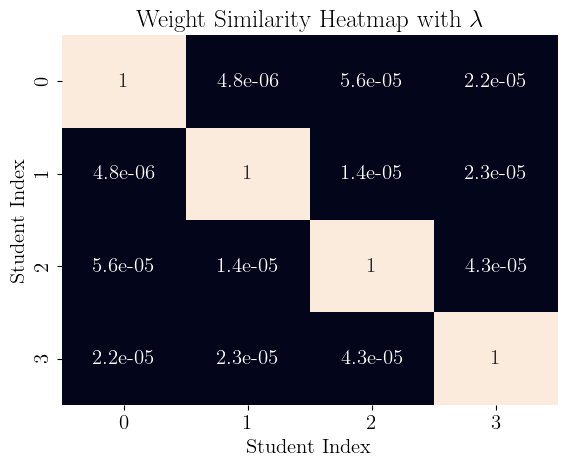

In [241]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Function to calculate bounded cosine similarity
def bounded_cosine_similarity(vec1, vec2):
    cosine_similarity = np.dot(vec1, vec2) / (np.linalg.norm(vec1) * np.linalg.norm(vec2))
    return np.abs(cosine_similarity)

# Example vectors (you can replace this with your vectors)
vectors = [dis[0][3][0][0], dis[0][3][1][0], dis[0][3][2][0], dis[0][3][3][0]]
num_vectors = len(vectors)
bounded_cosine_sim_matrix = np.zeros((num_vectors, num_vectors))

# Calculate bounded cosine similarity for each pair of vectors
for i in range(num_vectors):
    for j in range(num_vectors):
        bounded_cosine_sim_matrix[i, j] = bounded_cosine_similarity(vectors[i], vectors[j])

# Plot the heatmap
sns.heatmap(bounded_cosine_sim_matrix, annot=True, vmin=0, vmax=1, cbar=False)
plt.xlabel("Student Index")
plt.ylabel("Student Index")
plt.title("Weight Similarity Heatmap with $\lambda$")
plt.savefig('Weight Similarity Heatmap with lambda.pdf', format='pdf')
plt.show()


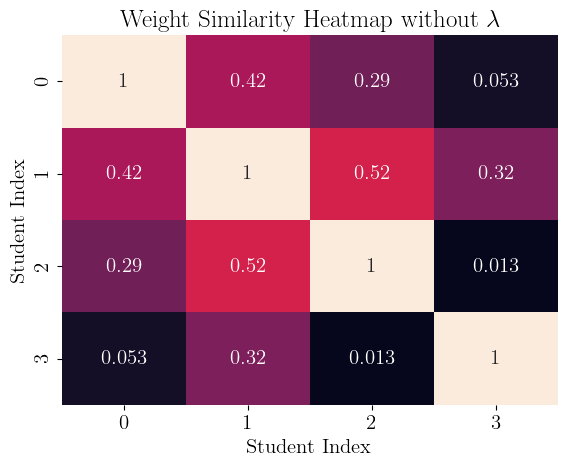

In [242]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Function to calculate bounded cosine similarity
def bounded_cosine_similarity(vec1, vec2):
    cosine_similarity = np.dot(vec1, vec2) / (np.linalg.norm(vec1) * np.linalg.norm(vec2))
    return np.abs(cosine_similarity)

# Example vectors (you can replace this with your vectors)
vectors = [no_dis[0][3][0][0], no_dis[0][3][1][0], no_dis[0][3][2][0], no_dis[0][3][3][0]]
num_vectors = len(vectors)
bounded_cosine_sim_matrix = np.zeros((num_vectors, num_vectors))

# Calculate bounded cosine similarity for each pair of vectors
for i in range(num_vectors):
    for j in range(num_vectors):
        bounded_cosine_sim_matrix[i, j] = bounded_cosine_similarity(vectors[i], vectors[j])

# Plot the heatmap
sns.heatmap(bounded_cosine_sim_matrix, annot=True, vmin=0, vmax=1, cbar=False)
plt.xlabel("Student Index")
plt.ylabel("Student Index")
plt.title("Weight Similarity Heatmap without $\lambda$")
plt.savefig('Weight Similarity Heatmap without lambda.pdf', format='pdf')
plt.show()
